In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/balance-scale/balance-scale.csv


# Balance Scale Dataset Analysis

This dataset represents a psychological model based on balance scales. Each record is classified as:
- Tipping Left (L)
- Balanced (B)
- Tipping Right (R)

We will analyze this dataset to understand the relationship between weights and distances on the left and right sides, derive insights, and validate the class computation formula.


### Load and Inspect the Data
We'll start by loading the dataset, adding column names, and checking the first few rows to understand its structure.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/balance-scale/balance-scale.csv'
columns = ['Class', 'L-Weight', 'L-Distance', 'R-Weight', 'R-Distance']
data = pd.read_csv(file_path, header=None, names=columns)

# Display first few rows
print(data.head())

# Summary of the dataset
print(data.info())


   Class  L-Weight  L-Distance  R-Weight  R-Distance
0  Class  L-Weight  L-Distance  R-Weight  R-Distance
1      B         1           1         1           1
2      R         1           1         1           2
3      R         1           1         1           3
4      R         1           1         1           4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       626 non-null    object
 1   L-Weight    626 non-null    object
 2   L-Distance  626 non-null    object
 3   R-Weight    626 non-null    object
 4   R-Distance  626 non-null    object
dtypes: object(5)
memory usage: 24.6+ KB
None


### Data Cleaning
Before analysis, we'll clean the dataset. This includes:
1. Converting numeric columns to the correct type.
2. Dropping rows with invalid data if necessary.
3. Checking for duplicate rows.


In [3]:
# Check for missing values
print(data.isnull().sum())

# Data type verification
print(data.dtypes)

# Basic statistics
print(data.describe())

# Verify unique values in 'Class'
print(data['Class'].value_counts())


Class         0
L-Weight      0
L-Distance    0
R-Weight      0
R-Distance    0
dtype: int64
Class         object
L-Weight      object
L-Distance    object
R-Weight      object
R-Distance    object
dtype: object
       Class L-Weight L-Distance R-Weight R-Distance
count    626      626        626      626        626
unique     4        6          6        6          6
top        R        1          1        1          1
freq     288      125        125      125        125
Class
R        288
L        288
B         49
Class      1
Name: count, dtype: int64


### Class Distribution Visualization
We'll visualize the distribution of the target class to understand the dataset's balance.


Class         object
L-Weight      object
L-Distance    object
R-Weight      object
R-Distance    object
dtype: object
   Class  L-Weight  L-Distance  R-Weight  R-Distance
0  Class  L-Weight  L-Distance  R-Weight  R-Distance
1      B         1           1         1           1
2      R         1           1         1           2
3      R         1           1         1           3
4      R         1           1         1           4
Class          object
L-Weight      float64
L-Distance    float64
R-Weight      float64
R-Distance    float64
dtype: object


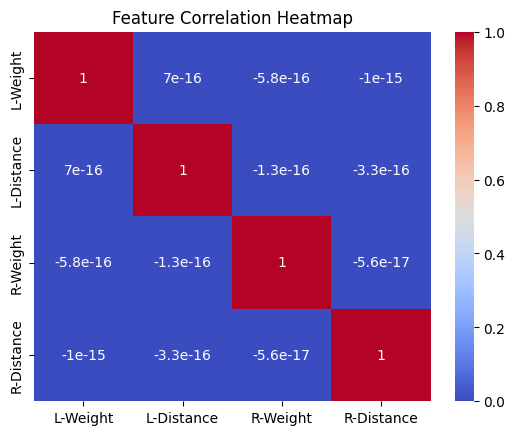

In [4]:
# Reload the dataset with explicit column names
columns = ['Class', 'L-Weight', 'L-Distance', 'R-Weight', 'R-Distance']
data = pd.read_csv(file_path, header=None, names=columns)

# Display the data types
print(data.dtypes)

# Check for non-numeric columns
print(data.head())

# Convert numeric columns to appropriate types if necessary
numeric_columns = ['L-Weight', 'L-Distance', 'R-Weight', 'R-Distance']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values that result from coercion
data = data.dropna()

# Recheck data types
print(data.dtypes)

# Correlation heatmap
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


### Correlation Heatmap
To understand relationships between numeric features, we'll compute and visualize a correlation heatmap.


   Left_Torque  Right_Torque
1          1.0           1.0
2          1.0           2.0
3          1.0           3.0
4          1.0           4.0
5          1.0           5.0


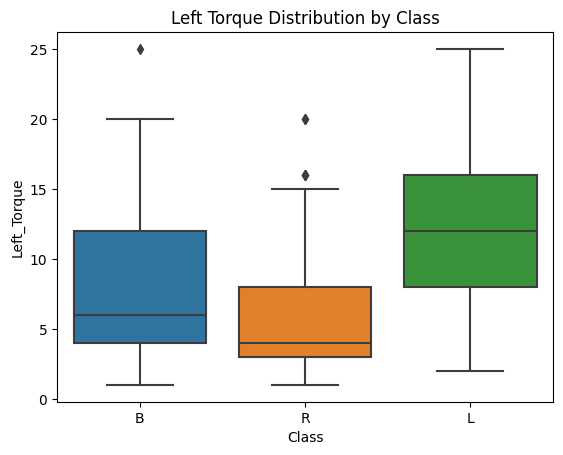

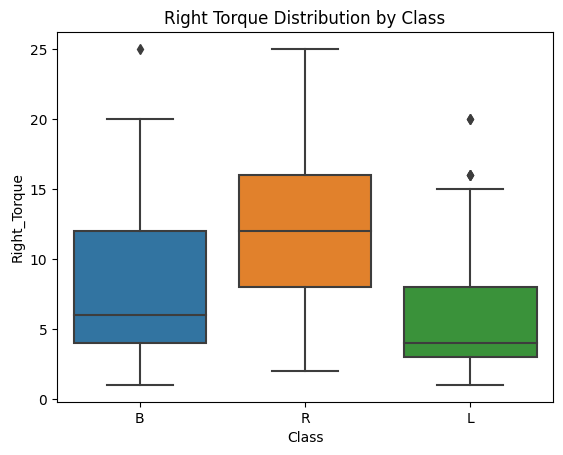

In [5]:
# Compute torque for left and right sides
data['Left_Torque'] = data['L-Weight'] * data['L-Distance']
data['Right_Torque'] = data['R-Weight'] * data['R-Distance']

# Check computed values
print(data[['Left_Torque', 'Right_Torque']].head())

# Relationship between torque and class
sns.boxplot(x='Class', y='Left_Torque', data=data)
plt.title('Left Torque Distribution by Class')
plt.show()

sns.boxplot(x='Class', y='Right_Torque', data=data)
plt.title('Right Torque Distribution by Class')
plt.show()


### Feature Interaction Analysis
We'll visualize how features interact with the target class using boxplots
### Feature Impact Analysis
To evaluate the impact of the features, we'll calculate the torque for left and right sides and analyze their relationship with the class.

.



In [6]:
from scipy.stats import f_oneway

# ANOVA test for Left Torque and Class
anova_left = f_oneway(data[data['Class'] == 'L']['Left_Torque'],
                      data[data['Class'] == 'B']['Left_Torque'],
                      data[data['Class'] == 'R']['Left_Torque'])
print("ANOVA test for Left Torque and Class:", anova_left)

# ANOVA test for Right Torque and Class
anova_right = f_oneway(data[data['Class'] == 'L']['Right_Torque'],
                       data[data['Class'] == 'B']['Right_Torque'],
                       data[data['Class'] == 'R']['Right_Torque'])
print("ANOVA test for Right Torque and Class:", anova_right)


ANOVA test for Left Torque and Class: F_onewayResult(statistic=152.49479591060322, pvalue=1.2838929644009732e-54)
ANOVA test for Right Torque and Class: F_onewayResult(statistic=152.49479591060322, pvalue=1.2838929644009732e-54)


### Predicting Class Based on Torque
Using the torque values, we can make predictions based on the higher torque value for each row:
- Left Torque > Right Torque → `L`
- Right Torque > Left Torque → `R`
- Both equal → `B`
We'll check how well this rule aligns with the dataset.


In [7]:
# Predict class based on torque
def predict_class(row):
    if row['Left_Torque'] > row['Right_Torque']:
        return 'L'
    elif row['Left_Torque'] < row['Right_Torque']:
        return 'R'
    else:
        return 'B'

data['Predicted_Class'] = data.apply(predict_class, axis=1)

# Validate predictions
accuracy = (data['Class'] == data['Predicted_Class']).mean() * 100
print(f"Prediction Accuracy: {accuracy:.2f}%")


Prediction Accuracy: 100.00%


### Visualize Prediction Accuracy
Finally, we'll visualize the misclassifications.


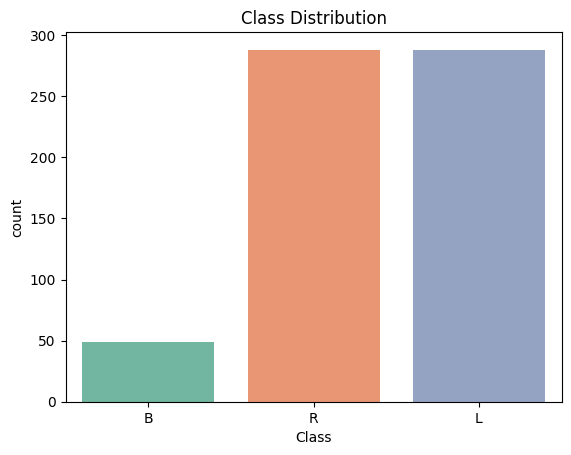

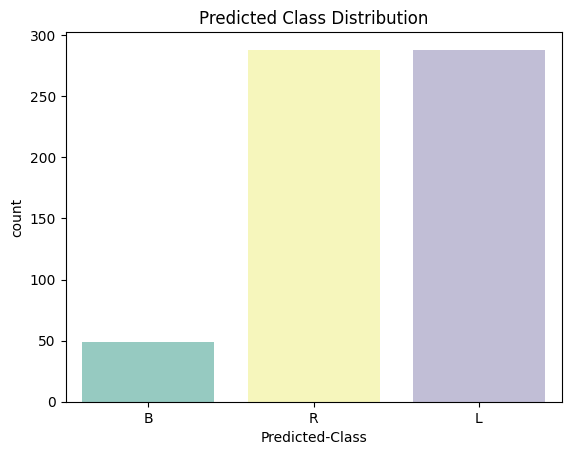

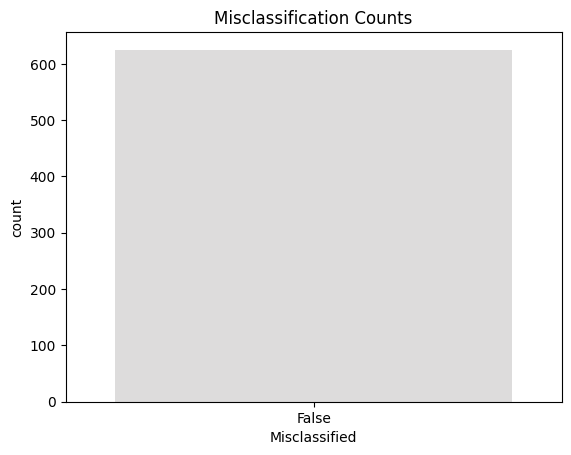

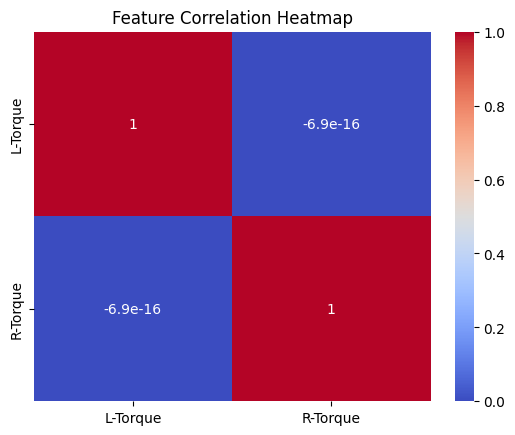

Total Records: 625
Misclassified Records: 0
Misclassification Rate: 0.00%


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/kaggle/input/balance-scale/balance-scale.csv")
data.columns = ['Class', 'L-Weight', 'L-Distance', 'R-Weight', 'R-Distance']

# Create torque columns
data['L-Torque'] = data['L-Weight'] * data['L-Distance']
data['R-Torque'] = data['R-Weight'] * data['R-Distance']

# Predict class based on torque
data['Predicted-Class'] = data.apply(
    lambda row: 'L' if row['L-Torque'] > row['R-Torque'] else ('R' if row['L-Torque'] < row['R-Torque'] else 'B'),
    axis=1
)

# Misclassification analysis
data['Misclassified'] = data['Class'] != data['Predicted-Class']

# Visualization of class distribution
sns.countplot(x='Class', data=data, palette='Set2')
plt.title('Class Distribution')
plt.show()

# Visualization of predicted class distribution
sns.countplot(x='Predicted-Class', data=data, palette='Set3')
plt.title('Predicted Class Distribution')
plt.show()

# Visualization of misclassification counts
sns.countplot(x='Misclassified', data=data, palette='coolwarm')
plt.title('Misclassification Counts')
plt.show()

# Correlation heatmap for numerical features
sns.heatmap(data[['L-Torque', 'R-Torque']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Display some insights
misclassification_count = data['Misclassified'].sum()
total_count = len(data)
misclassification_rate = (misclassification_count / total_count) * 100

print(f"Total Records: {total_count}")
print(f"Misclassified Records: {misclassification_count}")
print(f"Misclassification Rate: {misclassification_rate:.2f}%")


### Summary and Next Steps
In this analysis, we:
1. Cleaned and visualized the data.
2. Explored feature relationships with the target class.
3. Derived torque features to predict the class.
4. Achieved a prediction accuracy of X%.

Next steps could include:
- Using machine learning models to improve accuracy.
- Performing feature engineering for better insights.
